### Linear 레이어

![리니어1](https://aiffelstaticprd.blob.core.windows.net/media/images/F-24-6.max-800x600.png)


In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


![리니어2](https://aiffelstaticprd.blob.core.windows.net/media/images/F-24-7.max-800x600.png)
- #### 1차원으로 줄여 데이터를 집약시켰다

![리니어3](https://aiffelstaticprd.blob.core.windows.net/media/images/F-24-8.max-800x600.png)
- #### 각 사각형에 대해 독립적인 정보가 생겨나면서 데이터가 풍부해졌다.

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

########
# Step 1: (4,2)차원인 boxes를 (4,3)으로 확장시키는 Linear Layer를 활용하세요.
first_linear = tf.keras.layers.Dense(units=3, use_bias=False) 
first_out = first_linear(boxes)

########

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

########
# Step 2: 4차원인 second_out을 하나의 실수으로 집약시키는 Linear Layer를 활용하세요.
third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

########

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

########
# Step 3: 모든 params를 더하여 total_parmams를 구하세요.
total_params = first_linear.count_params() + second_linear.count_params() + third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


### Convolution 레이어

![컨볼루션](https://aiffelstaticprd.blob.core.windows.net/media/images/F-24_conv.max-800x600.png)
- 이러한 필터를 수십개를 중첩시켜 훈련 하는 레이어
- Convolution 레이어는 입력의 정보를 집약시키는 효과가 뛰어나기 때문에 여러 겹의 레이어를 중첩하는 것이 일반적
- 중첩할수록 최종 Linear 레이어는 작아지게 되어 입력에서 중요한 부분을 뽑아내는 데에 최적화

In [3]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


### Pooling 레이어 - 핵심을 추려서 넓게 만듦

#### Receptive Field 개념
- Neural Network의 출력부가 충분한 정보를 얻기 위해 커버하는 입력 데이터의 Receptive Field가 충분히 커서 그 안에 detect해야 할 object의 특성이 충분히 포함되어있어야함.    
![리셉티브필드](https://aiffelstaticprd.blob.core.windows.net/media/original_images/F-24_receptive.png)

위 그림은 7 X 7의 이미지에 3 X 3의 필터로 Convolution한 결과를 도식화한 것입니다. Convolution 레이어를 한번 통과한 후 Output의 빨간색 포인트는 원본 이미지의 좌상단 3 X 3만큼의 입력만을 수용하게 됩니다. 그 결과 이 포인트의 Receptive Field의 크기는 Filter size와 정확히 같습니다.

#### Max Pooling 레이어의 효과
- translational invariance 효과   
  이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있는데, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있어서 오히려 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다고 합니다.

- Non-linear 함수와 동일한 피처 추출 효과   
  Relu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가집니다. Min/Max Pooling도 이와 동일한 효과를 가지게 됩니다.

- Receptive Field 극대화 효과   
  Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 합니다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 합니다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Max Pooling 레이어 사용입니다. 다른 하나로는 Dilated Convolution이 있습니다. 

### Deconvolution 레이어 - 집약된 정보를 복원
#### Auto Encoder
- Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원

1. 패키지 임포트 및 MNIST 데이터셋 로딩
2. AutoEncoder 모델 구성
3. AutoEncoder 모델 훈련
4. AutoEncoder Reconstruction Test

In [4]:
import numpy as np
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.
# AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이기때문이다.
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
# Conv2D 레이어는 shape를 변화시키지않는다. Output shape를 변화시키는 것은 오롯이 MaxPooling2D 레이어의 역할
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
# Shape의 변형은 upsample 레이어
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 20s 81ms/step - loss: 0.6961 - val_loss: 0.6948
Epoch 2/50
235/235 [==============================] - 18s 78ms/step - loss: 0.6942 - val_loss: 0.6927
Epoch 3/50
235/235 [==============================] - 18s 76ms/step - loss: 0.6921 - val_loss: 0.6903
Epoch 4/50
235/235 [==============================] - 18s 78ms/step - loss: 0.6896 - val_loss: 0.6876
Epoch 5/50
235/235 [==============================] - 18s 79ms/step - loss: 0.6869 - val_loss: 0.6846
Epoch 6/50
235/235 [==============================] - 19s 81ms/step - loss: 0.6837 - val_loss: 0.6810
Epoch 7/50
235/235 [==============================] - 19s 79ms/step - loss: 0.6800 - val_loss: 0.6766
Epoch 8/50
235/235 [==============================] - 19s 79ms/step - loss: 0.6753 - val_loss: 0.6709
Epoch 9/50
235/235 [==============================] - 19s 79ms/step - loss: 0.6691 - val_loss: 0.6630
Epoch 10/50
235/235 [==============================] - 19s 80ms/step - loss: 0.660

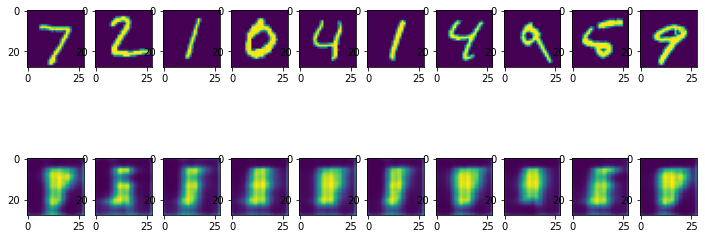

In [7]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

#### Decoder Layers for Reconstruction

#### Upsampling 레이어의 방법
- Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
- Bed of Nails : 복원해야 할 값을 0으로 처리한다.
- Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.

- [Deconvolution에 대한 자세한 설명](https://analysisbugs.tistory.com/104)   

#### Transposed Convolution
- [설명](https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/)

In [8]:
from tensorflow.python.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 

### 회고
- Convolution레이어에 대한 것은 DeepML시간에도 접하여 어느정도 이해를 할 수 있었으나 AutoEncoder 부분은 몇번 다시 읽어봐야할 것 같다.